In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Data set

In [5]:
df = pd.read_csv('housing.csv')

In [6]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
## Sumarizing the stats of the data

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df = df[['price','area','bedrooms','bathrooms','stories','parking']]

In [10]:
df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [11]:
df.isnull().sum()

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

In [12]:
### Exploratory Data Analysis
## Correlation

df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


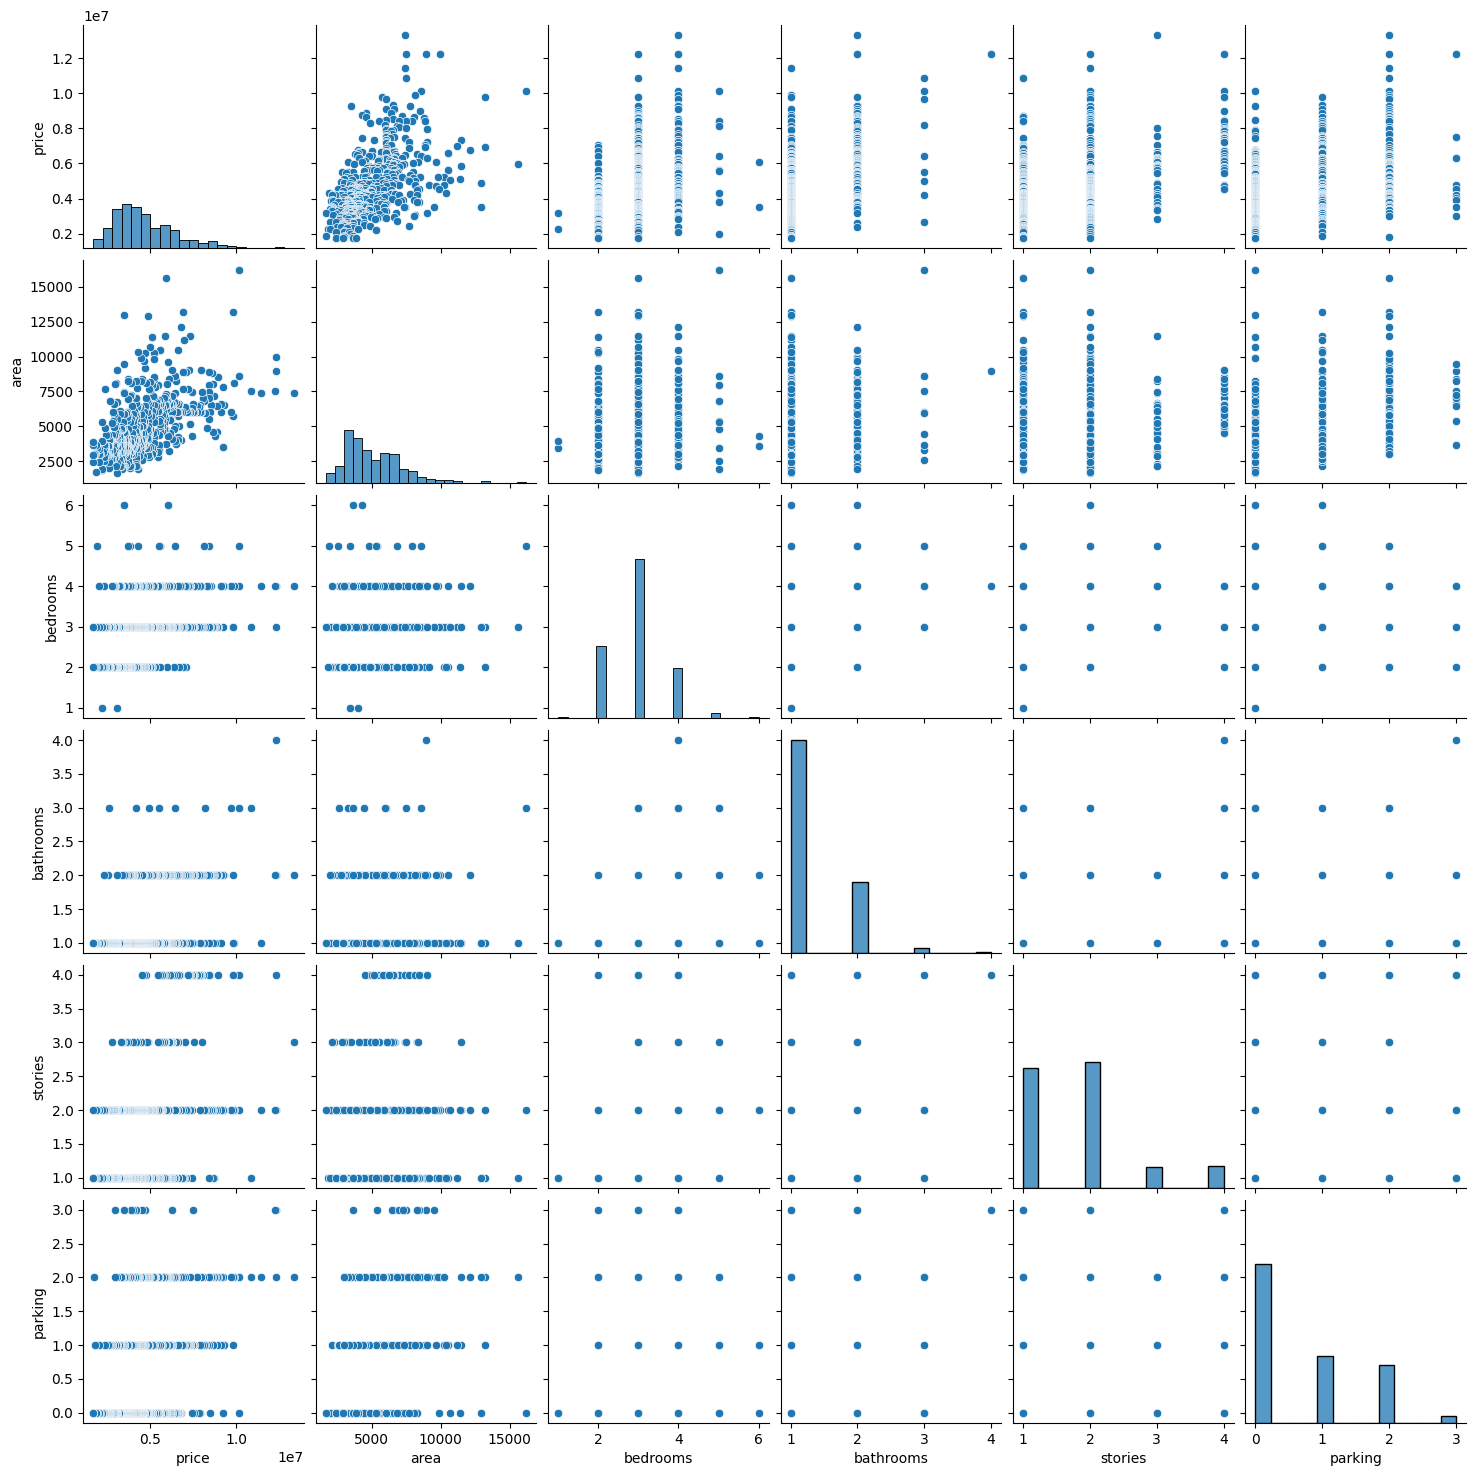

In [13]:
import seaborn as sns
sns.pairplot(df)

In [41]:
## Independent and Dependent features

X=df.iloc[:,1:]
y=df.iloc[:,0]

In [42]:
##Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [43]:
X_train

,area,bedrooms,bathrooms,stories,parking
126,7160,3,1,1,2
363,3584,2,1,1,0
370,4280,2,1,1,2
31,7000,3,1,4,2
113,9620,3,1,1,2
...,...,...,...,...,...
71,6000,4,2,4,0
106,5450,4,2,1,0
270,4500,3,2,3,1
435,4040,2,1,1,0


In [44]:
X_test

,area,bedrooms,bathrooms,stories,parking
316,5900,4,2,2,1
77,6500,3,2,3,0
360,4040,2,1,1,0
90,5000,3,1,2,0
493,3960,3,1,1,0
...,...,...,...,...,...
395,3600,6,1,2,1
425,3185,2,1,1,2
195,4410,4,3,2,2
452,9000,3,1,2,2


In [45]:
y_train

126    5880000
363    3710000
370    3640000
31     8400000
113    6083000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 381, dtype: int64

In [46]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [47]:
X_train=scaler.fit_transform(X_train)

In [48]:
X_test=scaler.transform(X_test)

### Model Training


In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
regression=LinearRegression()

In [51]:
regression.fit(X_train,y_train)

LinearRegression()

In [52]:
## print the coefficients and the intercept
print(regression.coef_)

[716018.50725313 121094.01332387 566514.55477224 407191.00819909
 330653.45726931]


In [53]:
print(regression.intercept_)

4762406.272965879


In [54]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [55]:
### Prediction with Test Data
reg_pred=regression.predict(X_test)

### Assumtions

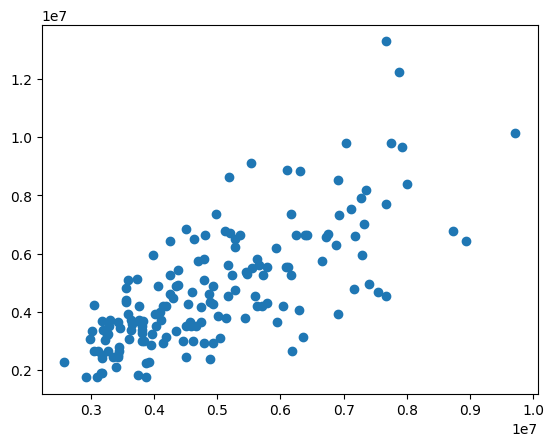

In [56]:
## plot a scatter plot for the prediction
plt.scatter(reg_pred,y_test)

In [57]:
residuals = y_test-reg_pred

In [58]:
residuals

316   -2.238756e+06
77     2.376995e+05
360    4.080020e+05
90     2.188279e+06
493   -6.367327e+05
           ...     
395   -1.169433e+06
425   -4.514194e+05
195   -2.427721e+06
452   -3.209825e+06
154   -2.622659e+05
Name: price, Length: 164, dtype: float64

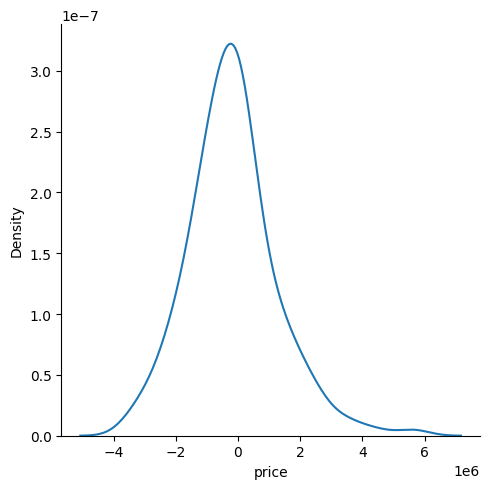

In [59]:
## plot this residuals

sns.displot(residuals,kind="kde")

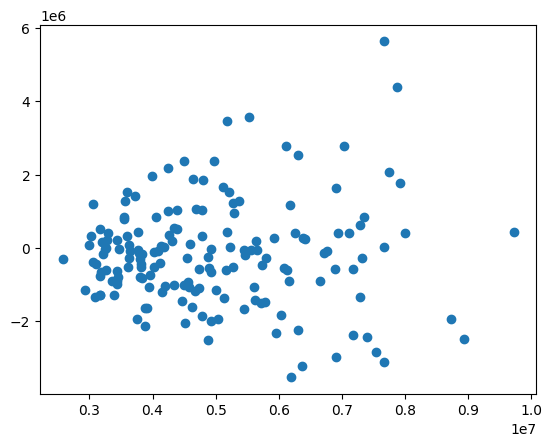

In [61]:
## Scatter plot with respect to prediction and residuals
plt.scatter(reg_pred,residuals)

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

1065137.8263727794
2044165115591.7866
1429743.0243200304


### Pickling The Model file for Deployment

In [74]:
X_test[1]

array([ 0.63077698,  0.0558608 ,  1.55459927,  1.41326862, -0.80051057])

In [63]:
import pickle

In [66]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [67]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [77]:
pickled_model.predict(scaler.transform(X_test[0].reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2338522.35960586])

In [73]:
pickled_model.score(X_test,y_test)

0.5253182966980272